In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


(1080, 1080, 3)


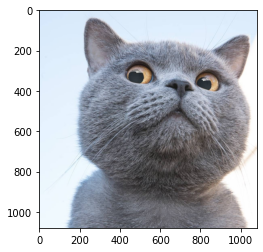

(1080, 1080, 3)


In [3]:
img = cv2.imread('cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
plt.show()
print(img.shape)

<h4>Upsampling the Image into 800*800</h4>

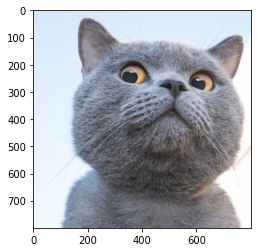

(800, 800, 3)


In [5]:
img2 = cv2.resize(img, dsize=(800,800), interpolation=cv2.INTER_CUBIC)
plt.imshow(img2)
plt.show()
print(img2.shape)

<h4>Loading Pretrained VGG16</h4>

In [6]:

model1 = torchvision.models.vgg16(pretrained=True).to(device)
model1_features = list(model1.features)
print(len(model1_features))
print(model1)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/yearat/.cache/torch/hub/checkpoints/vgg16-397923af.pth



31
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilati

<h4> Running a dummy Image to collect layers which produce output dim >= 50x50 </h4> 

In [53]:
dummy_img = torch.zeros((1, 3, 800, 800)).float()
print(dummy_img.shape)
required_features = []
k = false_img.clone().to(device)
for i in model1_features:
    k = i(k)
    if k.size()[2] < 800//16:
        break
    required_features.append(i)
    out_channels = k.size()[1]
print(len(required_features))
print(out_channels)

torch.Size([1, 3, 800, 800])
30
512


<h4> Built the Extractor 1 with collected layers </h5>

In [67]:
extractor1 = nn.Sequential(*required_features) 

# Takes the entire extractor part/drops classifier of VGG16
# gets output of torch.Size([1, 512, 50, 50])

In [68]:
transform = transforms.Compose([transforms.ToTensor()]) # Defing PyTorch Transform
imgTensor = transform(img2).to(device) 
imgTensor = imgTensor.unsqueeze(0)
out_map = extractor1(imgTensor)
print(out_map.size())

torch.Size([1, 512, 50, 50])


<h4> Extractor 1 outputs [batch_size, channel_no, pixel, pixel] (1, 512, 50x50) </h5> 

<h4> Extractor 2 setup and same procedure </h4>

In [11]:

model2 = torchvision.models.resnet18(pretrained=True).to(device)
print(model2)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/yearat/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [86]:
extractor2 = nn.Sequential(*(list(model2.children())[:-2])) # Drop last 2 layers

In [24]:
transform = transforms.Compose([transforms.ToTensor()]) # Defing PyTorch Transform
imgTensor = transform(img2).to(device) 
imgTensor = imgTensor.unsqueeze(0)
out_map = extractor2(imgTensor)
print(out_map.size())

torch.Size([1, 512, 25, 25])


In [25]:
extractor2 = nn.Sequential(*(list(model2.children())[:-3])) # Drop last 3 layers

In [26]:
transform = transforms.Compose([transforms.ToTensor()]) # Defing PyTorch Transform
imgTensor = transform(img2).to(device) 
imgTensor = imgTensor.unsqueeze(0)
out_map = extractor2(imgTensor)
print(out_map.size())

torch.Size([1, 256, 50, 50])


Extractor2 can't provide same output as Extractor1.
    If we exclude last 2 layers we get (512, 25x25) and
    If we exclude last 3 laayers we get (256, 50x50)
    But Extractor1 outputs (512, 50x50)


<h2> Now the goal is to take different layers from VGG16 to match 
    Feature Extractor2's (ResNet18) output. </h2>
 

In [73]:

extractor1_v2 = nn.Sequential(*(list(model1.children())[:-2]))


In [79]:
print("Feature Extractor 1")
print(extractor1)


Feature Extractor 1
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d

In [80]:
print("Feature Extractor 1 version 2")
print(extractor1_v2)


Feature Extractor 1 version 2
Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, s

extractor1_v2 has one extra layer of MaxPool2d of kernel_size = stride = 2 
which eventually convert 50x50 into 25x25 

<h4>Check Output of extractor1_v2 (VGG16)</h4>

In [88]:
transform = transforms.Compose([transforms.ToTensor()]) # Defing PyTorch Transform
imgTensor = transform(img2).to(device) 
imgTensor = imgTensor.unsqueeze(0)
ex1_out_map = extractor1_v2(imgTensor)
print(ex1_out_map.size())

torch.Size([1, 512, 25, 25])


<h4>Check Output of extractor2 (ResNet18) { Dropped last 2 layers version }</h4>

In [89]:
transform = transforms.Compose([transforms.ToTensor()]) # Defing PyTorch Transform
imgTensor = transform(img2).to(device) 
imgTensor = imgTensor.unsqueeze(0)
ex2_out_map = extractor2(imgTensor)
print(ex2_out_map.size())

torch.Size([1, 512, 25, 25])


Now both extractors are having same outputs of dimension batch=1, channel=512, img=25x25 

<h2> Now we have to perform element wise average from extractors </h2> 

In [108]:
equal_val = torch.equal(ex1_out_map, ex2_out_map)
shape = ex1_out_map.size() == ex2_out_map.size()
print("Contain Equal Values: " +str(equal_val))
print("Same Shape of Tensor: " +str(shape))
ex1_out_map.size()


Contain Equal Values: False
Same Shape of Tensor: True


torch.Size([1, 512, 25, 25])

In [104]:
outx1 = ex1_out_map * 0.6 # multiplying with weight
outx2 = ex2_out_map * 0.4 # multiplying with weight
weightedMean = outx1.add(outx2) # addition of two tensors

out = torch.mean(weightedMean)
out

tensor(0.4176, grad_fn=<MeanBackward0>)

In [111]:
outx1 = ex1_out_map 
outx2 = ex2_out_map
ensembled = outx1.add(outx2)
ensembled = torch.div(ensembled, 2)
ensembled.size()

torch.Size([1, 512, 25, 25])

tensor 'ensembled' holds the mean of the outputs of two extractors

<h4> ensembled is to be provided as the input of RPN of Faster RCNN </h4>